In [2]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
df=pd.read_csv('/content/inventory_dataset_advanced.csv')
df

,item_id,item_name,category,current_stock,reorder_level,max_stock_capacity,last_restock_date,units_sold_last_30d,avg_daily_sales,days_since_restock,item_price,rating,num_reviews,promotion_flag,seasonality_index,expected_demand,supplier,warehouse_section,predicted_status
0,1,Face Wash,Toiletries,382,116,465,27-05-2025,98,3.27,67,84.94,3.9,1147,1,1.35,5.29740,LMN Supplies,B1,Normal
1,2,Namkeen,Snacks,96,81,325,10-04-2025,126,4.20,114,25.29,2.6,224,1,1.31,6.60240,ABC Corp,B1,Normal
2,3,Toothpaste,Toiletries,334,109,439,26-06-2025,96,3.20,37,91.12,3.5,451,0,0.92,2.94400,XYZ Traders,C2,Normal
3,4,Salt,Food,66,34,139,09-05-2025,47,1.57,85,96.99,4.4,1897,1,1.32,2.48688,LMN Supplies,A2,Normal
4,5,Soft Drink,Beverages,180,112,448,21-04-2025,213,7.10,103,57.46,1.9,588,0,1.24,8.80400,ABC Corp,A1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Face Wash,Toiletries,245,50,203,01-05-2025,279,9.30,93,118.79,3.8,1340,1,0.92,10.26720,LMN Supplies,B1,Overstock
9996,9997,Toothpaste,Toiletries,111,141,567,06-07-2025,35,1.17,27,63.07,2.8,1921,0,0.84,0.98280,XYZ Traders,B1,Low
9997,9998,Wheat Flour,Food,490,114,458,07-04-2025,218,7.27,117,24.14,3.8,405,1,1.27,11.07948,QRS Wholesalers,C2,Overstock
9998,9999,Namkeen,Snacks,392,112,448,25-04-2025,9,0.30,99,22.80,1.0,912,1,0.81,0.29160,ABC Corp,A2,Overstock


In [4]:
df.isnull().sum()

,0
item_id,0
item_name,0
category,0
current_stock,0
reorder_level,0
max_stock_capacity,0
last_restock_date,0
units_sold_last_30d,0
avg_daily_sales,0
days_since_restock,0


In [5]:
df['predicted_status'].unique()

array(['Normal', 'Overstock', 'Low', 'Empty'], dtype=object)

In [6]:
df.describe()

,item_id,current_stock,reorder_level,max_stock_capacity,units_sold_last_30d,avg_daily_sales,days_since_restock,item_price,rating,num_reviews,promotion_flag,seasonality_index,expected_demand
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,196.741900,87.013200,349.543100,149.774900,4.992506,60.147000,77.869173,2.989380,996.060700,0.495200,1.151079,6.306531
std,2886.89568,141.074372,36.404244,145.619215,86.550706,2.885014,34.436826,41.977342,1.154295,581.465732,0.500002,0.203015,3.917263
min,1.00000,0.000000,25.000000,100.000000,0.000000,0.000000,1.000000,5.020000,1.000000,0.000000,0.000000,0.800000,0.000000
25%,2500.75000,82.000000,55.000000,221.000000,76.000000,2.530000,31.000000,41.427500,2.000000,487.000000,0.000000,0.970000,3.063400
50%,5000.50000,168.000000,87.000000,350.000000,151.000000,5.030000,60.000000,78.020000,3.000000,999.000000,0.000000,1.150000,6.084000
75%,7500.25000,290.000000,119.000000,476.000000,225.000000,7.500000,90.000000,114.575000,4.000000,1506.000000,1.000000,1.330000,9.130175
max,10000.00000,643.000000,149.000000,599.000000,299.000000,9.970000,119.000000,149.960000,5.000000,1999.000000,1.000000,1.500000,17.766000


In [7]:
df=df.drop(columns=['item_id','supplier','rating', 'num_reviews', 'last_restock_date'])

In [8]:
df.columns

Index(['item_name', 'category', 'current_stock', 'reorder_level',
       'max_stock_capacity', 'units_sold_last_30d', 'avg_daily_sales',
       'days_since_restock', 'item_price', 'promotion_flag',
       'seasonality_index', 'expected_demand', 'warehouse_section',
       'predicted_status'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_name            10000 non-null  object 
 1   category             10000 non-null  object 
 2   current_stock        10000 non-null  int64  
 3   reorder_level        10000 non-null  int64  
 4   max_stock_capacity   10000 non-null  int64  
 5   units_sold_last_30d  10000 non-null  int64  
 6   avg_daily_sales      10000 non-null  float64
 7   days_since_restock   10000 non-null  int64  
 8   item_price           10000 non-null  float64
 9   promotion_flag       10000 non-null  int64  
 10  seasonality_index    10000 non-null  float64
 11  expected_demand      10000 non-null  float64
 12  warehouse_section    10000 non-null  object 
 13  predicted_status     10000 non-null  object 
dtypes: float64(4), int64(6), object(4)
memory usage: 1.1+ MB


In [10]:
categorical_var=['warehouse_section','predicted_status','item_name']
le=LabelEncoder()

In [11]:
for i in categorical_var:
  df[i]=le.fit_transform(df[i])

In [12]:
df

,item_name,category,current_stock,reorder_level,max_stock_capacity,units_sold_last_30d,avg_daily_sales,days_since_restock,item_price,promotion_flag,seasonality_index,expected_demand,warehouse_section,predicted_status
0,7,Toiletries,382,116,465,98,3.27,67,84.94,1,1.35,5.29740,2,2
1,11,Snacks,96,81,325,126,4.20,114,25.29,1,1.31,6.60240,2,2
2,22,Toiletries,334,109,439,96,3.20,37,91.12,0,0.92,2.94400,5,2
3,16,Food,66,34,139,47,1.57,85,96.99,1,1.32,2.48688,1,2
4,19,Beverages,180,112,448,213,7.10,103,57.46,0,1.24,8.80400,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7,Toiletries,245,50,203,279,9.30,93,118.79,1,0.92,10.26720,2,3
9996,22,Toiletries,111,141,567,35,1.17,27,63.07,0,0.84,0.98280,2,1
9997,24,Food,490,114,458,218,7.27,117,24.14,1,1.27,11.07948,5,3
9998,11,Snacks,392,112,448,9,0.30,99,22.80,1,0.81,0.29160,1,3


In [13]:
df=pd.get_dummies(df,columns=['category'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_name             10000 non-null  int64  
 1   current_stock         10000 non-null  int64  
 2   reorder_level         10000 non-null  int64  
 3   max_stock_capacity    10000 non-null  int64  
 4   units_sold_last_30d   10000 non-null  int64  
 5   avg_daily_sales       10000 non-null  float64
 6   days_since_restock    10000 non-null  int64  
 7   item_price            10000 non-null  float64
 8   promotion_flag        10000 non-null  int64  
 9   seasonality_index     10000 non-null  float64
 10  expected_demand       10000 non-null  float64
 11  warehouse_section     10000 non-null  int64  
 12  predicted_status      10000 non-null  int64  
 13  category_Beverages    10000 non-null  bool   
 14  category_Electronics  10000 non-null  bool   
 15  category_Food       

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_name             10000 non-null  int64  
 1   current_stock         10000 non-null  int64  
 2   reorder_level         10000 non-null  int64  
 3   max_stock_capacity    10000 non-null  int64  
 4   units_sold_last_30d   10000 non-null  int64  
 5   avg_daily_sales       10000 non-null  float64
 6   days_since_restock    10000 non-null  int64  
 7   item_price            10000 non-null  float64
 8   promotion_flag        10000 non-null  int64  
 9   seasonality_index     10000 non-null  float64
 10  expected_demand       10000 non-null  float64
 11  warehouse_section     10000 non-null  int64  
 12  predicted_status      10000 non-null  int64  
 13  category_Beverages    10000 non-null  bool   
 14  category_Electronics  10000 non-null  bool   
 15  category_Food       

In [16]:
X=df.drop(columns=['predicted_status'])
y=df['predicted_status']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
models={
'Logistic Regression':LogisticRegression(solver='saga',multi_class='multinomial',max_iter=1000),
'Random Forest':RandomForestClassifier(),
'XGBoost':XGBClassifier(use_label_encoder=False,eval_metrics='mlogloss'),
'Support Vector Machine':SVC()
}

In [23]:
def eval_model(model, X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred,average='weighted')
  recall=recall_score(y_test,y_pred,average='weighted')
  f1=f1_score(y_test,y_pred,average='weighted')

  return accuracy,precision,recall,f1


In [24]:
results=[]
for name,model in models.items():
  accuracy,precision,recall,f1=eval_model(model,X_train,y_train,X_test,y_test)
  results.append({
        "Model":name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:15:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, itera

In [27]:
results_df=pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.9945,0.992027,0.9945,0.993260
1,Random Forest,0.9670,0.967162,0.9670,0.966865
2,XGBoost,0.9780,0.977763,0.9780,0.977859
3,Support Vector Machine,0.9890,0.986529,0.9890,0.987761



Best Model (Machine Learning):
Model        Logistic Regression
Accuracy                  0.9945
Precision               0.992027
Recall                    0.9945
F1-Score                 0.99326
Name: 0, dtype: object


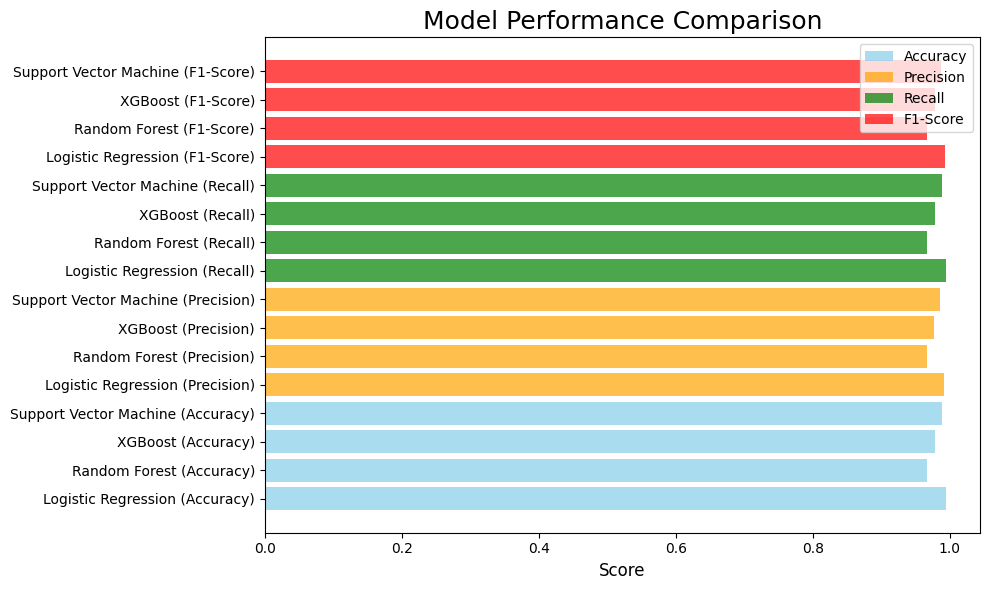


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.9945


In [28]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


In [29]:
lr=LogisticRegression(solver='saga',multi_class='multinomial',max_iter=1000)
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [30]:
y_pred=lr.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.98      0.99      0.99       387
           2       1.00      1.00      1.00      1056
           3       1.00      1.00      1.00       552

    accuracy                           0.99      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.99      0.99      0.99      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


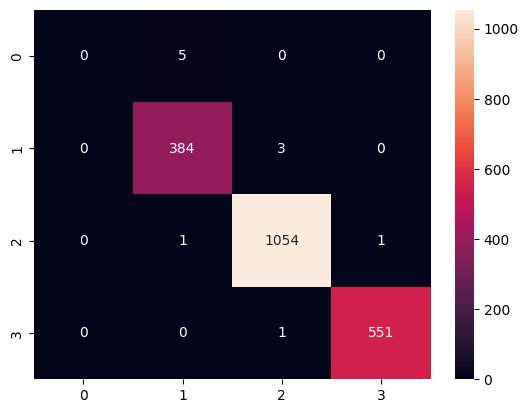

In [32]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [ ]:
joblib.dump()